['step_size', 'nsteps', 'qvector', 'target_pcd_array', 'final_pcd_traj', 'final_xyz_traj', 'final_chi2_traj', 'factor_distribution', 'final_distances', 'chi2_path']
[  0.   10.4  20.8  31.2  41.6  52.   62.4  72.8  83.2  93.6 104.  114.4
 124.8 135.2 145.6 156.  166.4 176.8 187.2]


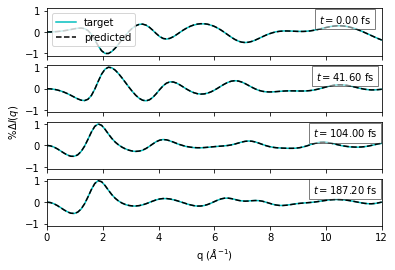

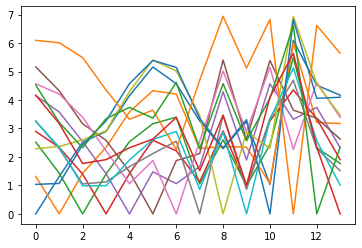

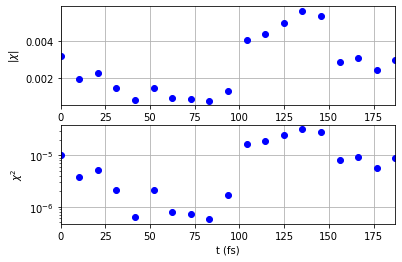

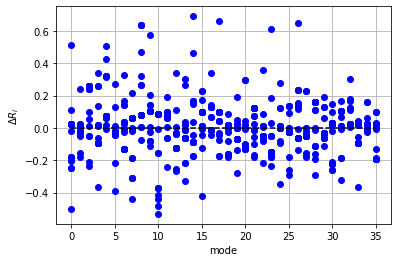

In [18]:
import numpy as np
import matplotlib.pyplot as p

title = 'chd'
plot_bool = True
png_plot = False
png_plot_rmsd = False

stepsize_list=[0.2]
#stepsize_list=[0.05]
#qmax_list=(4.0, 6.0, 8.0)
qmax_list=[25.0]
#N = 400
#Nt = 39
nt_list = [19]
#nsteps_list = [991, 1991, 2991, 4991, 9991]
#nsteps_list = [19, 99, 199, 299, 499, 
#               498, 998, 1498, 1998,
#               994,
#               493,
#               997, 1497, 1997,
#               20, 100, 200, 300, 500, 
#               191, 991, 1991, 2991, 4991, 9991]

#nsteps_list = [493, 993, 1992, 2992]
style_list = ['bo', 'rx', 'k-', 'c-.', 'g.', 'm-', 'kx',
             'ro', 'co', 'mo',
              'g-', 'go', 'cx', 'y-', 'k.', 'mx',
             ]
#ds = 0.2

file_list = [
            'data_chd_qmax_25.0_ds_0.20_N_1992_nt_39.npz',
            'data_chd_qmax_25.0_ds_0.20_N_2992_nt_39.npz',
            'data_chd_qmax_25.0_ds_0.20_N_2992_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_1997_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_3997_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_4991_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_4999_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_9999_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.10_N_9999_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.10_N_4997_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.10_N_4998_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_1009_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.10_N_1407_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.10_N_1500_nt_29.npz',
            'data_chd_qmax_25.0_ds_0.20_N_1501_nt_29.npz',
            ]
    
file_list = [
            'data_chd_qmax_25.0_ds_0.10_N_2003_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_1003_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_1002_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_1001_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_503_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_103_nt_49.npz',
            ]

file_list = [
            'data_chd_qmax_25.0_ds_0.10_N_1003_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.10_N_5000_nt_49.npz',
            ]

file_list = [
            'data_chd_qmax_25.0_ds_0.04_N_4999_nt_49.npz',
            ]

file_list = [
    # all 900-something are the same
    # they have 9 restarts and 2 reverts
    # all have T0 = 0.5
            #'data_chd_qmax_25.0_ds_0.10_N_900_nt_49.npz',  # I cheated in this one, it worked but I started at t=20
            #'data_chd_qmax_25.0_ds_0.10_N_901_nt_49.npz',  
            #'data_chd_qmax_25.0_ds_0.10_N_902_nt_49.npz',
            #'data_chd_qmax_25.0_ds_0.10_N_903_nt_49.npz',
            #'data_chd_qmax_25.0_ds_0.20_N_450_nt_49.npz',  # same but half steps, ds=0.2, 4 reverts
            # exp(w0/wk) damping, and back to 2 reverts
            #'data_chd_qmax_25.0_ds_0.05_N_899_nt_49.npz',  #same as 900 runs (this one opened correctly!)
            #'data_chd_qmax_25.0_ds_0.05_N_1800_nt_49.npz', # To Do: same as 899 but more steps e.g. 1800. 
            # lower qmax tests... 
            #'data_chd_qmax_12.0_ds_0.05_N_800_nt_49.npz',  #lower q-range (just a test)
            # force restart if chi2 < 0.1:
            #'data_chd_qmax_12.0_ds_0.10_N_400_nt_49.npz',
    #force restart based on thresh_arr
            #'data_chd_qmax_12.0_ds_0.10_N_200_nt_24.npz',
            #'data_chd_qmax_12.0_ds_0.05_N_201_nt_24.npz',
            #'data_chd_qmax_12.0_ds_0.05_N_201_nt_30.npz',
            #'data_chd_qmax_12.0_ds_0.05_N_199_nt_30.npz',
            'data_chd_qmax_25.0_ds_0.05_N_199_nt_49.npz',
            'data_chd_qmax_25.0_ds_0.05_N_198_nt_49.npz',
            # To Do: traj 98 (seems to open faster, good test)
            # and/or traj 94, opens weirdly, maybe interesting.
            # close ring, manually create one from t=49-0 traj001
            ]

#file_list = [
#    'data_chd_qmax_12.0_ds_0.05_N_394_nt_24.npz',
#    'data_chd_qmax_12.0_ds_0.05_N_394_nt_49.npz',
#    ]

# R_094 stride 3 runs:
file_list = [
    'data_chd_qmax_25.0_ds_0.04_N_900_nt_26.npz',
    'data_chd_qmax_25.0_ds_0.04_N_894_nt_26.npz',
    'data_chd_qmax_25.0_ds_0.10_N_901_nt_26.npz',
    'data_chd_qmax_25.0_ds_0.10_N_1429_nt_26.npz',
    'data_chd_qmax_25.0_ds_0.04_N_890_nt_26.npz',
    ]

# R_094 stride 4 runs:
file_list = [
    'data_chd_qmax_25.0_ds_0.05_N_502_nt_18.npz',
    'data_chd_qmax_25.0_ds_0.10_N_502_nt_12.npz',
    'data_chd_qmax_25.0_ds_0.10_N_502_nt_18.npz',
    'data_chd_qmax_25.0_ds_0.05_N_503_nt_18.npz',  # 0.05, 0.1 steps 10-11, 0.15 after
    'data_chd_qmax_25.0_ds_0.05_N_504_nt_18.npz',  # 0.05, 0.1 steps 10-11, 0.15 after (2 -> 3 reverts)
    'data_chd_qmax_25.0_ds_0.05_N_505_nt_18.npz',  # 0.05, 0.1 steps 4-11, 0.15 after (3 reverts)
    'data_chd_qmax_25.0_ds_0.05_N_995_nt_18.npz',  # same, more steps, start from step 9 (0:8 known)
    'data_chd_qmax_25.0_ds_0.05_N_906_nt_18.npz',  # start from step 13
    'data_chd_qmax_25.0_ds_0.05_N_1906_nt_18.npz', # same with even more steps
    'data_chd_qmax_25.0_ds_0.04_N_1906_nt_18.npz', # ds = 0.04, start from step 11
    # try: w-damping (to slow down hydrogens), and/or h-mode clamping
    # NB: w-damping was already on for all of these
    # try: restart.npz
    # try: higher temperature at higher time-steps
]

# R_001 stride 4
file_list = [
    'data_chd_qmax_12.0_ds_0.05_N_1001_nt_19.npz',
    'data_chd_qmax_12.0_ds_0.05_N_501_nt_19.npz',   # known values; showing that it can find the correct geom if it knows the previous
    'data_chd_qmax_12.0_ds_0.10_N_19999_nt_19.npz',  # 0 restarts, 5 reverts, huge Nsteps
    'data_chd_qmax_12.0_ds_0.10_N_999_nt_19.npz',   # restart from 19999 run, but now I normalised target
    # and prediced pcd to have abs. max value of 1
]

# same, but normalised target and predicted
file_list = [
    #'data_chd_qmax_12.0_ds_0.06_N_1295_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.08_N_1095_nt_19.npz',  # restart >1e-4
    #'data_chd_qmax_12.0_ds_0.10_N_1995_nt_19.npz',  # restart >1e-4
    #'data_chd_qmax_12.0_ds_0.10_N_3995_nt_19.npz',  # restart >5e-5
    #'data_chd_qmax_12.0_ds_0.10_N_4995_nt_19.npz',  # restart >6e-5
    #'data_chd_qmax_12.0_ds_0.10_N_4994_nt_19.npz',  # restart >6e-5, decreased T0 to 0.1 from 0.2
    # >3e-5, 2 restarts, ds=0.05. Trying to perfect early time-steps
    #'data_chd_qmax_12.0_ds_0.05_N_3992_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.05_N_14992_nt_19.npz', # more steps
    #'data_chd_qmax_12.0_ds_0.10_N_10992_nt_19.npz', # >3e-5
    #'data_chd_qmax_12.0_ds_0.10_N_7992_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.15_N_4992_nt_19.npz', # quick test, 0 reverts, 0 restarts
    #'data_chd_qmax_12.0_ds_0.15_N_8992_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.12_N_9109_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.05_N_5909_nt_19.npz', # >1e-6, less restarts and reverts, just trying to improve early time-steps
    # +1 restart, that's it
    #'data_chd_qmax_12.0_ds_0.02_N_5809_nt_19.npz',
    #'data_chd_qmax_12.0_ds_0.20_N_14809_nt_19.npz', # way more steps, larger ds
    
    ### I started again. 1st low-ds cycle to accurately find early time-steps 
    #'data_chd_qmax_12.0_ds_0.03_N_10007_nt_19.npz',
    'r_050_stride4_data/data_chd_qmax_12.0_ds_0.03_N_10050_nt_19.npz',  # already got really good match, only 1 restart!
]

#style_list = ['go',  'co',  'bo',  'ko',  'mo',
#              'y-.', 'yx', 'y--', 'yo',
#              'r-.', 'rx', 'ro', 'r--',
#              'k-',
#              'c-',
#              'g-',  'r-',  'b-',  'k-.',  'm-', 
#              'g--', 'r--', 'b--', 'k--', 'm--', 'c--']
"""
    step_size=step_size,
    nsteps=nsteps,
    qvector=qvector,
    target_pcd_array=target_pcd_array,
    final_pcd_traj=final_pcd_traj,
    final_xyz_traj=final_xyz_traj,
    final_chi2_traj=final_chi2_traj,
    factor_distribution=factor_distribution,
    chi2_path=chi2_path,
"""
#final_chd_qmax_25.0_ds_0.10_N_499_nt_1.xyz...
#final_chd_qmax_4.0_ds_0.10_N_498_nt_40.xyz
#data_chd_qmax_4.0_ds_0.10_N_990_nt_20.npz
#data_chd_qmax_25.0_ds_0.10_N_100_nt_1.npz
c = -1
for data_file in file_list:
    c += 1

    #try:
    if True:
        #data_file = 'data_chd_qmax_25.0_ds_0.50_N_493_nt_39.npz'
        #data_file = ('data_%s_qmax_%2.1f_ds_%3.2f_N_%i_nt_%i.npz' 
        #            % (title, qq, ds, N, Nt))
        f = np.load(data_file)
        print(f.files)
        target_pcd_array = f['target_pcd_array']
        final_pcd_array = f['final_pcd_traj']
        final_xyz_array = f['final_xyz_traj']
        final_chi2_array = f['final_chi2_traj']
        final_chi2_array[final_chi2_array > 1e8] = 1e-6
        factor_distribution = f['factor_distribution']
        chi2_path = f['chi2_path']
        step_size = f['step_size']
        qvector = f['qvector']
        distances = f['final_distances']
        qmax = qvector[-1]

        time_points = np.array([0, 4, 10, 18])
        #time_points = np.array([0, 10, 32, 48])
        #time_points = np.array([0])
        stride = 4
        fs_points = time_points * 2.6 * stride
        target_pcd = target_pcd_array[:, time_points]
        final_pcd = final_pcd_array[:, time_points]
        final_chi2 = final_chi2_array[time_points]
        if plot_bool:
            #p.figure(1 + 3*c)
            p.figure(1)
            ax1 = p.subplot(411)
            style1 = 'k--'
            style2 = 'c-'
            ms1 = 2.5
            ms2 = 2.5
            al = 0.5
            p.plot(qvector, target_pcd[:, 0], style2, ms=ms2)
            p.plot(qvector, final_pcd[:, 0], style1, ms=ms1)
            p.tick_params('x', labelbottom=False)
            p.legend(('target', 'predicted'), loc='upper left')
            ypos = 0.6
            xpos = 0.89*qmax
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[0], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax2 = p.subplot(412, sharex=ax1, sharey=ax1)
            p.plot(qvector, target_pcd[:, 1], style2, ms=ms2)
            p.plot(qvector, final_pcd[:, 1], style1, ms=ms1)
            p.tick_params('x', labelbottom=False)
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[1], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax3 = p.subplot(413, sharex=ax1, sharey=ax1)
            p.plot(qvector, target_pcd[:, 2], style2, ms=ms2)
            p.plot(qvector, final_pcd[:, 2], style1, ms=ms1)
            p.tick_params('x', labelbottom=False)
            p.ylabel('               %$\Delta I(q)$')
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[2], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            ax4 = p.subplot(414, sharex=ax1, sharey=ax1)
            p.plot(qvector, target_pcd[:, 3], style2, ms=ms2)
            p.plot(qvector, final_pcd[:, 3], style1, ms=ms1)
            p.xlabel('q $(\AA^{-1})$')
            p.xlim(0, qmax)
            p.text(xpos, ypos, '$t = %3.2f$ fs' % fs_points[3], 
                         horizontalalignment='center',
                         verticalalignment='center',
                         bbox=dict(facecolor='white', alpha=al))
            #p.grid()
            #p.show()       
            #p.legend(stepsize_list)
            if True:
                fname = 'report/lineouts.png'
                p.savefig(fname, dpi=300, facecolor='w', 
                        edgecolor='w', orientation='portrait', 
                        format='png', transparent=False, 
                        bbox_inches='tight', pad_inches=0.1, 
                        metadata=None)
            #p.figure(2 + 3*c)
            p.figure(2)
            #p.semilogy(list(range(Nt)), final_chi2_array, style_list[c])
            time_fs = np.linspace(0,18,19,endpoint=True)
            time_fs *= 2.6 * stride
            print(time_fs)
            ax1 = p.subplot(211)
            p.plot(time_fs, np.sqrt(final_chi2_array), style_list[c])
            #p.plot(time_fs, np.sqrt(final_chi2_array), 'k.')

            p.grid()
            p.ylabel('$|\chi|$')
            ax2 = p.subplot(212, sharex=ax1)
            p.semilogy(time_fs, (final_chi2_array), style_list[c])
            p.xlabel('t (fs)')
            p.ylabel('$\chi^2$')
            p.grid()
            p.xlim((0, time_fs[-1]))
            #p.ylim((1e-2, 2))
            #p.show()
            #p.legend(stepsize_list)
            if True:
                fname = ('%s_chi2_vary_stepsize_qmax_%2.1f.png' % 
                      (title, qmax))
                fname = 'report/chi2_t.png'
                p.savefig(fname, dpi=300, facecolor='w', 
                        edgecolor='w', orientation='portrait', 
                        format='png', transparent=False, 
                        bbox_inches='tight', pad_inches=0.1, 
                        metadata=None)

            p.figure(3)
            #print(distances)
            p.plot(distances)
            
            #p.figure(3 + 3*c)
            p.figure(4)
            p.plot(factor_distribution, style_list[c])
            p.xlabel('mode')
            p.ylabel('$\Delta R_i$')
            p.grid()
    #except:
    #    continue
p.figure(2)
#p.legend(nsteps_list, bbox_to_anchor=(1,1), loc="upper left")
#p.legend(file_list, bbox_to_anchor=(1,1), loc="upper left")

p.figure(4)
p.plot(np.zeros(len(factor_distribution)), 'k--')


19
18.0
[  0.   10.4  20.8  31.2  41.6  52.   62.4  72.8  83.2  93.6 104.  114.4
 124.8 135.2 145.6 156.  166.4 176.8 187.2]


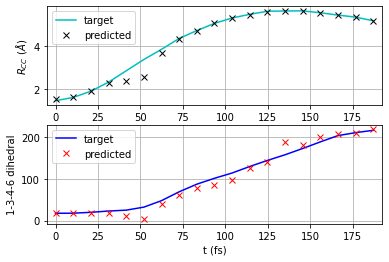

In [31]:
import numpy as np
import matplotlib.pyplot as p

rCC_target = np.loadtxt('report/rcc_target_stride4.dat')
#rCC_predicted = np.loadtxt('RCC_chd_qmax_25.0_ds_0.20_N_1996_nt_40.dat')
rCC_predicted1 = np.loadtxt('report/rcc_1003.dat')
rCC_predicted2 = np.loadtxt('report/rcc_1002.dat')
rCC_predicted3 = np.loadtxt('report/rcc_997_robust.dat')
rCC_predicted4 = np.loadtxt('report/rcc_cheating.dat')
rCC_predicted5 = np.loadtxt('report/rcc_198.dat')
rCC_predicted6 = np.loadtxt('report/rcc_14809.dat')
rCC_predicted6 = np.loadtxt('report/rcc_5007.dat')

print(rCC_target.shape[0])
print(rCC_target[-1, 0])
stride = 4
time = np.linspace(0, stride * 2.6 * rCC_target[-1, 0], rCC_target.shape[0])
print(time)

ax1 = p.subplot(211)
p.plot(time, rCC_target[:, 1], 'c')
p.plot(time, rCC_predicted6[:, 1], 'kx')
#p.plot(time, rCC_predicted2[:, 1], 'k.')
#p.plot(time, rCC_predicted3[:, 1], 'g-.')
#p.plot(time, rCC_predicted4[:, 1], 'm.')
#p.plot(time, rCC_predicted5[:, 1], 'y--')

p.legend(('target', 'predicted'))
p.xlabel('t (fs)')
p.ylabel('$R_{CC}\ (\AA)$')
p.grid()
p.xlim((-5, time[-1] + 5))


dih_target = np.loadtxt('dihedral_target_mod.dat')
dih2 = np.loadtxt('dih2.dat')
ax2 = p.subplot(212, sharex=ax1)

p.plot(time, dih_target[:, 1], 'b-')
p.plot(time, dih2[:, 1], 'rx')
p.grid()
p.legend(('target', 'predicted'))
p.xlabel('t (fs)')
p.ylabel('1-3-4-6 dihedral')


fname = 'report/rcc_plots.png'
p.savefig(fname, dpi=300, facecolor='w', 
        edgecolor='w', orientation='portrait', 
        format='png', transparent=False, 
        bbox_inches='tight', pad_inches=0.1, 
        metadata=None)

chi2_min T = 0: 0.00020
chi2_min T = 0.1: 0.00017
chi2_min T = 0.2: 0.00011
chi2_min T = 0.5: 0.00015
chi2_min T = 1.0: 0.00022
chi2_min T = 0(2000): 0.00018
chi2_min T = 0.1(2000): 0.00006
chi2_min T = 0.2(2000): 0.00004
chi2_min T = 0.5(2000): 0.00001
chi2_min T = 1.0(2000): 0.00007


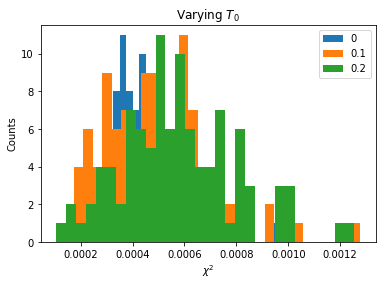

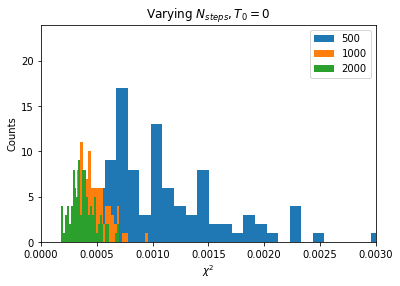

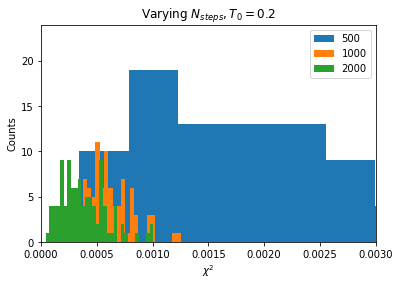

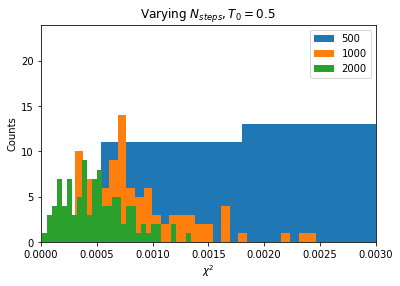

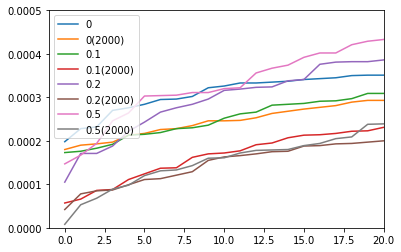

In [100]:
fpath = 'chd_data'
chi2_0p0 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p1 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p2 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_0p5 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N1000_100runs.dat' % fpath)
chi2_1p0 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N1000_100runs.dat' % fpath)

chi2_0p0_500 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p1_500 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p2_500 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_0p5_500 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N500_100runs.dat' % fpath)
chi2_1p0_500 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N500_100runs.dat' % fpath)

chi2_0p0_2000 = np.loadtxt('%s/T0p0_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p1_2000 = np.loadtxt('%s/T0p1_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p2_2000 = np.loadtxt('%s/T0p2_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_0p5_2000 = np.loadtxt('%s/T0p5_ds0p1_q4_25_N2000_100runs.dat' % fpath)
chi2_1p0_2000 = np.loadtxt('%s/T1p0_ds0p1_q4_25_N2000_100runs.dat' % fpath)

print('chi2_min T = 0: %6.5f'   % min(chi2_0p0))
print('chi2_min T = 0.1: %6.5f' % min(chi2_0p1))
print('chi2_min T = 0.2: %6.5f' % min(chi2_0p2))
print('chi2_min T = 0.5: %6.5f' % min(chi2_0p5))
print('chi2_min T = 1.0: %6.5f' % min(chi2_1p0))
print('chi2_min T = 0(2000): %6.5f'   % min(chi2_0p0_2000))
print('chi2_min T = 0.1(2000): %6.5f' % min(chi2_0p1_2000))
print('chi2_min T = 0.2(2000): %6.5f' % min(chi2_0p2_2000))
print('chi2_min T = 0.5(2000): %6.5f' % min(chi2_0p5_2000))
print('chi2_min T = 1.0(2000): %6.5f' % min(chi2_1p0_2000))

p.figure(1)
nbins = 30
p.hist(chi2_0p0, bins=nbins)
p.hist(chi2_0p1, bins=nbins)
p.hist(chi2_0p2, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $T_0$')
p.legend((0, 0.1, 0.2))

p.figure(2)
p.hist(chi2_0p0_500, bins=nbins)
p.hist(chi2_0p0, bins=nbins)
p.hist(chi2_0p0_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(3)
#p.subplot(111)
p.hist(chi2_0p2_500, bins=nbins)
p.hist(chi2_0p2, bins=nbins)
p.hist(chi2_0p2_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0.2$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(4)
#p.subplot(212)
p.hist(chi2_0p5_500, bins=nbins)
p.hist(chi2_0p5, bins=nbins)
p.hist(chi2_0p5_2000, bins=nbins)
p.xlabel('$\chi^2$')
p.ylabel('Counts')
p.title('Varying $N_{steps}, T_0=0.5$')
p.legend((500, 1000, 2000))
p.xlim((0, .003))
p.ylim((0, 24))

p.figure(5)
p.plot(np.sort(chi2_0p0))
p.plot(np.sort(chi2_0p0_2000))
p.plot(np.sort(chi2_0p1))
p.plot(np.sort(chi2_0p1_2000))
p.plot(np.sort(chi2_0p2))
p.plot(np.sort(chi2_0p2_2000))
p.plot(np.sort(chi2_0p5))
p.plot(np.sort(chi2_0p5_2000))
#p.plot(np.sort(chi2_1p0))
p.xlim((-1, 20))
p.ylim((0, .0005))
p.legend((0, '0(2000)', 0.1, '0.1(2000)', 0.2, '0.2(2000)', 0.5, '0.5(2000)', 1, '1(2000)'))

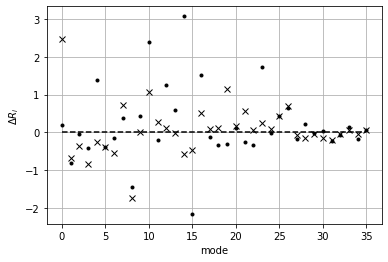

In [104]:
# factor dist
fdist1000 = np.load('data_chd_qmax_4.0_T0_0.5_ds_0.10_N_1000_Nruns_5.npz')['factor_distribution']
fdist2000 = np.load('data_chd_qmax_4.0_T0_0.5_ds_0.10_N_2000_Nruns_5.npz')['factor_distribution']
p.plot(fdist1000, 'kx')
p.plot(fdist2000, 'k.')
p.plot(np.zeros(len(fdist1000)), 'k--')
p.xlabel('mode')
p.ylabel('$\Delta R_i$')
p.grid()

[ 1. nan nan nan nan nan nan nan nan]


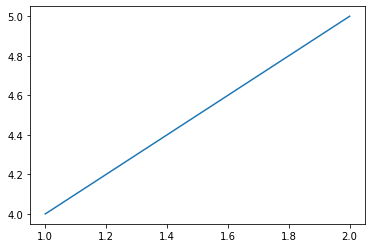

In [8]:
import math
p.plot([0, 1, 2], [math.nan, 4, 5])

x = np.zeros(9)
x[0] = 1
x[x==0] = math.nan

print(x)

In [4]:
import numpy as np
f = np.load('data_chd_qmax_12.0_ds_0.02_N_5809_nt_19.npz')
pcd1 = f['final_pcd_traj']
chi1 = f['final_chi2_traj']
xyz1 = f['final_xyz_traj']

f = np.load('data_chd_qmax_12.0_ds_0.20_N_14809_nt_19.npz')
pcd2 = f['final_pcd_traj']
chi2 = f['final_chi2_traj']
xyz2 = f['final_xyz_traj']
f.files

nt = len(chi1)
final_pcd_traj = pcd1
final_xyz_traj = xyz1
chi2_path = chi1
for t in range(nt):
    if chi1[t] < chi2[t]:
        chi2_path[t] = chi1[t]
        final_pcd_traj[:, t] = pcd1[:, t]
        final_xyz_traj[:, :, t] = xyz1[:, :, t]
    else:
        chi2_path[t] = chi2[t]
        final_pcd_traj[:, t] = pcd2[:, t]
        final_xyz_traj[:, :, t] = xyz2[:, :, t]

np.savez('restart.npz',
         final_chi2_traj=chi2_path,
         final_pcd_traj=final_pcd_traj,
         final_xyz_traj=final_xyz_traj,
        )